# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Brandon Lac

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [17]:
# TODO: Import dataset and inspect the first five columns
df = pd.read_csv("./seeds_dataset.txt", sep="\s+", engine='python')
print(df.head(5))
df.shape

   15.26  14.84   0.871  5.763  3.312  2.221   5.22  1
0  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
1  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
2  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
3  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
4  14.38  14.21  0.8951  5.386  3.312  2.462  4.956  1


(209, 8)

Next, you will need to separate the data into your feature matrix and target vector.

In [18]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.drop(df.columns[7], axis=1)
y = df[df.columns[7]]
print(X.shape)
print(y.shape)

(209, 7)
(209,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

I am going to use standardscaler for this data set because I want all the data points to be included in the model.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [19]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
# TODO: Print the shape of the training feature matrix and target vector
print(X_train.shape)
print(y_train.shape)

(167, 7)
(167,)


Now that we have our training data, we can implement our selected scaler.

In [21]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [22]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [23]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [26]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Cross Validation Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test_scaled)

test_score = accuracy_score(y_test, y_pred)
print("Test Score:", test_score)

Cross Validation Score: 0.9520499108734402
Best Parameters: {'C': 10.0, 'fit_intercept': True}
Test Score: 0.9285714285714286


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [28]:
# TODO: Predict y labels using best estimator
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
best_e = grid_search.best_estimator_
y_pred = best_e.predict(X_test_scaled)

In [29]:
# TODO: Reduce dimensions of test data for plotting
pca = PCA(n_components=2) 
X_test_pca = pca.fit_transform(X_test_scaled)

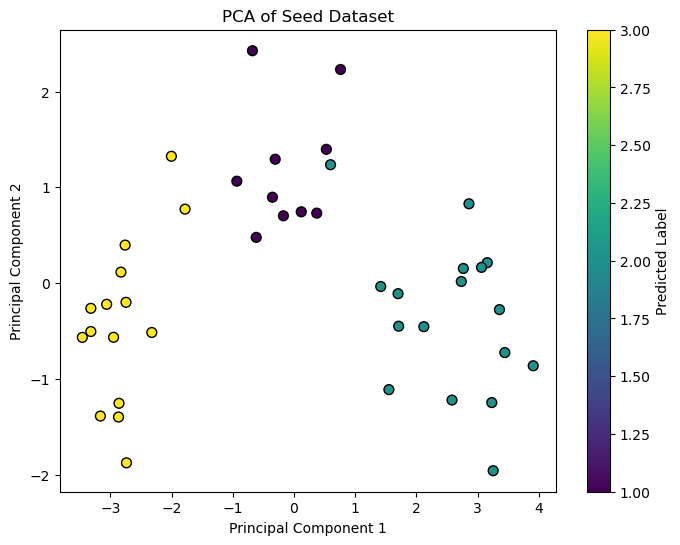

In [30]:
# TODO: Plot test points colored by predicted label
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Seed Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Predicted Label')
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

The logisitic regression model worked well for the dataset as the accuracy and testing scores were high, can conclude that its not overfitting or underfitting.

The PCA does work well, as we can see illustrated that there are distinct clusters. 



### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

The source of the code was through lecture notes and examples.
Completed the steps from begining to end.
No generative AI was used as the assignment was pretty straight forward.
No, I did not have any challenges doing the assignment. This was probably due to the course material being complete.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [95]:
# TODO: Scale feature matrix
scaler_cluster = StandardScaler()
X_scaled = X.copy()
scaler_cluster.fit(X_scaled)
X_scaled = scaler_cluster.transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\Brandon\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Brandon\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Brandon\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Brandon\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

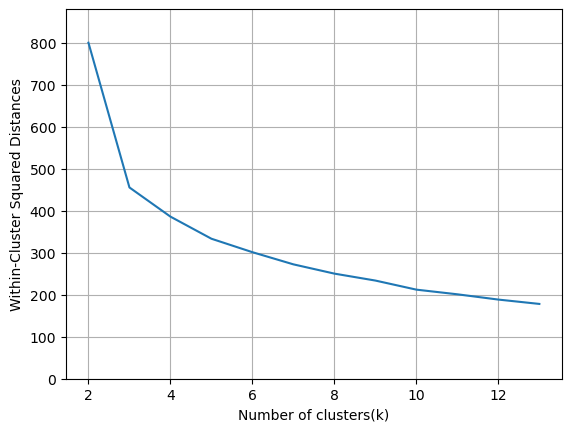

In [96]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
inertia = []
for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(X_scaled)
    inertia.append(kmeans.inertia_ )
    
inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
plt.grid(True)
ax.legend().set_visible(False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [98]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, random_state=4, n_init=10)
kmeans.fit(X_scaled)

C:\Users\Brandon\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=4)

In [99]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

score_Sil = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
score_CH = calinski_harabasz_score (X_scaled, kmeans.labels_)
score_DB = davies_bouldin_score (X_scaled, kmeans.labels_)
print(score_Sil)
print(score_CH)
print(score_DB)

0.469309917762322
274.89580014805716
0.7947963729501453


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

<Axes: >

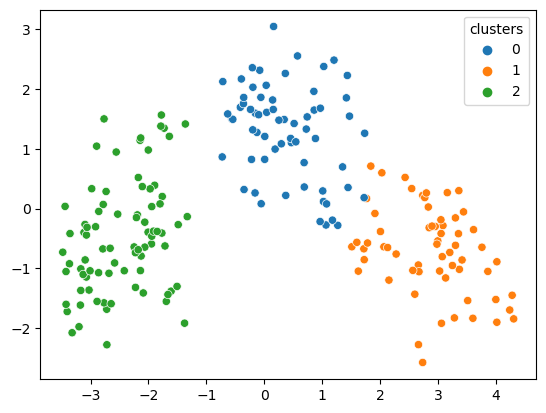

In [100]:
# TODO: Plot clustering results
from sklearn.decomposition import PCA
X['clusters'] = kmeans.labels_
X['clusters'] = X['clusters'].astype('category')
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_2D = pca.transform(X_scaled)
sns.scatterplot(x=X_2D[:,0], y=X_2D[:,1], hue=X['clusters'])

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [101]:
# TODO: Find the number of principal components using explained variance ratio
pca = PCA().fit(X_scaled)
explained_variance = pca.explained_variance_ratio_.cumsum()

n_components = len(explained_variance[explained_variance <= 0.95])
print("Principal Components:", n_components)

Principal Components: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [102]:
# TODO: Use PCA to transform the data
pca2 = PCA(n_components=n_components)
X_pca = pca2.fit_transform(X)

In [103]:
# TODO: Implement K-means with the transformed data
kmeans = KMeans(n_clusters=3, random_state=4, n_init=10)
kmeans.fit(X_pca)

C:\Users\Brandon\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=4)

In [105]:
# TODO: Calculate the three different validation metrics
score_Sil_PCA = silhouette_score(X_pca, kmeans.labels_, metric='euclidean')
score_CH_PCA = calinski_harabasz_score (X_pca, kmeans.labels_)
score_DB_PCA = davies_bouldin_score (X_pca, kmeans.labels_)
print(score_Sil_PCA)
print(score_CH_PCA)
print(score_DB_PCA)


0.469309917762322
274.89580014805716
0.7947963729501453


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [106]:
# TODO: Display results
results = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'X_scaled': [score_Sil, score_CH, score_DB],
    'X_pca': [score_Sil_PCA, score_CH_PCA, score_DB_PCA]
})

print(results)

                    Metric    X_scaled       X_pca
0         Silhouette Score    0.469310    0.517692
1  Calinski-Harabasz Score  274.895800  398.191034
2     Davies-Bouldin Score    0.794796    0.683868


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


From the PCA diagram above, we can see that the data is in 3 clusters. The optimal size of clusters was 3, which aligns with the PCA diagram
The PCA plot from part 2 and part 1 are very similar with just more data points in part 2.
I used 3 compoents in the PCA analysis, and it did improve the results. This is because the data is naturally in 3 clusters, so using 3 components fits the data well. All of the scores were better in the PCA.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

The source of the code was from lecture notes and examples.
Completed the steps from begining to end.
No generative AI was used in the assignment.
No challenges, the notes were enough.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


I enjoyed getting to work with clusters and how simple it is to set up. Motivating to know how to implement another form of machine learning.